In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the population dataset

In [37]:
#removes header, footer
pop = (pd.read_csv("M810011 - Singapore Residents By Age Group, Ethnic Group And Sex, End June, Annual.csv",
                  skiprows= 4, nrows= 75)
#replaces "NA" with NaN
       .replace(" na ",np.nan)
#removes columns with NaN/missing data
       .dropna(axis = 1)
       .set_index(" Variables "))
pop.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variables,,,,,,,,,,,,,,,,,,,,
Total Residents,"3,273,363","3,325,902","3,382,944","3,366,891","3,413,266","3,467,814","3,525,894","3,583,082","3,642,659","3,733,876","3,771,721","3,789,251","3,818,205","3,844,751","3,870,739","3,902,690","3,933,559","3,965,796","3,994,283","4,026,209"
0 - 4 Years,"225,705","222,991","217,798","209,903","204,819","199,529","194,479","193,626","193,889","197,788","194,432","188,249","186,673","183,295","181,369","183,575","187,160","187,653","185,528","185,355"
5 - 9 Years,"256,574","254,077","253,192","247,044","240,517","237,237","235,204","229,541","223,622","221,435","215,675","208,119","206,324","205,704","205,790","204,452","201,509","200,575","199,066","197,775"
10 - 14 Years,"235,352","246,972","257,692","259,124","257,283","258,553","256,482","255,292","253,796","248,628","244,302","240,536","233,320","226,244","220,796","214,388","207,495","206,253","206,530","207,926"
15 - 19 Years,"211,286","210,903","209,687","214,074","227,417","234,921","246,547","257,298","262,856","262,775","263,750","260,738","258,861","255,066","247,337","242,902","239,771","232,973","226,520","222,222"


In [38]:
# removes space and comma from values
pop.columns = pop.columns.str.strip()
pop[pop.columns.tolist()] = pop[pop.columns.tolist()].replace({",": "", " ":""}, regex=True)
#cast column into int
pop = pop.astype(int)
pop.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variables,,,,,,,,,,,,,,,,,,,,
Total Residents,3273363,3325902,3382944,3366891,3413266,3467814,3525894,3583082,3642659,3733876,3771721,3789251,3818205,3844751,3870739,3902690,3933559,3965796,3994283,4026209
0 - 4 Years,225705,222991,217798,209903,204819,199529,194479,193626,193889,197788,194432,188249,186673,183295,181369,183575,187160,187653,185528,185355
5 - 9 Years,256574,254077,253192,247044,240517,237237,235204,229541,223622,221435,215675,208119,206324,205704,205790,204452,201509,200575,199066,197775
10 - 14 Years,235352,246972,257692,259124,257283,258553,256482,255292,253796,248628,244302,240536,233320,226244,220796,214388,207495,206253,206530,207926
15 - 19 Years,211286,210903,209687,214074,227417,234921,246547,257298,262856,262775,263750,260738,258861,255066,247337,242902,239771,232973,226520,222222


In [39]:
#rename variables to young/old dependents, working adults, totals and rows to be dropped
col = [""] + ["Young Dependent"]*3 + ["Working"]*10 + ["Drop"]*5 + ["Old Dependent"] + ["Drop"]*5
var = ['Total Resident ' + i for i in col] + ['Total Male ' + i for i in col] + ['Total Female ' + i for i in col]
pop["Variables"] = var
#remove rows to be dropped
pop = (pop[~pop["Variables"].str.contains("Drop")]
#group rows based on variables
       .groupby("Variables").sum())
pop.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variables,,,,,,,,,,,,,,,,,,,,
Total Female,1638696,1667344,1698649,1693490,1718235,1746675,1777652,1807605,1839667,1889144,1910588,1921081,1938159,1953247,1968329,1986062,2004033,2022251,2038445,2056827
Total Female Old Dependent,129432,134187,138425,138847,147664,156221,164485,170677,176229,183953,188811,196465,210075,223591,237680,252179,266716,282020,297995,315214
Total Female Working,1162228,1182891,1207466,1207834,1230120,1253106,1279912,1307325,1336592,1379253,1401744,1413082,1421421,1428519,1432769,1438582,1444846,1448686,1450904,1451935
Total Female Young Dependent,347036,350266,352758,346809,340451,337348,333255,329603,326846,325938,320033,311534,306663,301137,297880,295301,292471,291545,289546,289678
Total Male,1634667,1658558,1684295,1673401,1695031,1721139,1748242,1775477,1802992,1844732,1861133,1868170,1880046,1891504,1902410,1916628,1929526,1943545,1955838,1969382


In [40]:
pop = pop.transpose()
#reorder columns
pop = pop[['Total Resident ', 'Total Resident Working', 'Total Resident Young Dependent', 'Total Resident Old Dependent',
           'Total Male ', 'Total Male Working', 'Total Male Young Dependent', 'Total Male Old Dependent',
           'Total Female ', 'Total Female Working', 'Total Female Young Dependent', 'Total Female Old Dependent']]
pop.columns = pop.columns.str.strip()
pop

Variables,Total Resident,Total Resident Working,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
2000,3273363,2320436,717631,235296,1634667,1158208,370595,105864,1638696,1162228,347036,129432
2001,3325902,2358223,724040,243639,1658558,1175332,373774,109452,1667344,1182891,350266,134187
2002,3382944,2403238,728682,251024,1684295,1195772,375924,112599,1698649,1207466,352758,138425
2003,3366891,2402182,716071,248638,1673401,1194348,369262,109791,1693490,1207834,346809,138847
2004,3413266,2446106,702619,264541,1695031,1215986,362168,116877,1718235,1230120,340451,147664
2005,3467814,2492802,695319,279693,1721139,1239696,357971,123472,1746675,1253106,337348,156221
2006,3525894,2545003,686165,294726,1748242,1265091,352910,130241,1777652,1279912,333255,164485
2007,3583082,2599037,678459,305586,1775477,1291712,348856,134909,1807605,1307325,329603,170677
2008,3642659,2655562,671307,315790,1802992,1318970,344461,139561,1839667,1336592,326846,176229
2009,3733876,2735893,667851,330132,1844732,1356640,341913,146179,1889144,1379253,325938,183953


# Preparing the Electricity Generation and Usage dataset

In [41]:
elec = (pd.read_csv("M890841 - Electricity Generation And Consumption, Annual.csv",skiprows= 4, nrows=18)
#replaces "NA" with NaN
       .replace(" na ",np.nan)
#removes columns with NaN/missing data
       .dropna(axis = 1)
       .set_index(" Variables "))
elec.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Variables,,,,,,,,,,,,,,
Electricity Generation *,"38,212.7","39,480.4","41,134.1","41,669.6","41,800.6","45,366.5","45,999.4","46,936.2","47,963.5","49,309.7","50,271.6","51,586.6","52,225.8","52,904.8"
Electricity Consumption *,"35,489.3","36,801.8","38,304.9","38,986.9","38,822.9","42,251.7","43,007.1","44,200.7","44,948.8","46,403","47,513.9","48,626.6","49,643.7","50,448.9"
Industrial-related,"14,509","15,115.4","15,819","16,030.9","15,570.3","17,662.6","18,077.5","18,572.5","18,842.8","19,753.2","20,088","20,418.4","21,516.3","21,450.7"
Manufacturing,"13,836.1","14,397.2","14,943.2","15,032.7","14,539.7","16,448","16,752.4","17,112.4","17,237.4","17,989","18,277.6","18,370.9","19,581.7","19,451.5"
Construction,234.8,250.5,279.1,300.9,308.3,337.8,363,443.7,490.5,527.1,531,551.6,484.3,432.3


In [42]:
# removes space from columns and column names
elec.columns = elec.columns.str.strip()
elec[elec.columns.tolist()] = elec[elec.columns.tolist()].replace({"\$": "", ",": "", " ":""}, regex=True)
elec.index = elec.index.str.strip("* ")
#cast column into int
elec = elec.astype(float)
elec = elec.transpose()
elec

Variables,Electricity Generation,Electricity Consumption,Industrial-related,Manufacturing,Construction,Utilities,Other Industrial-related,Commerce And Service-related,Wholesale And Retail Trade,Accommodation And Food Services,Information And Communications,Financial And Insurance Activities,Real Estate Activities,"Professional, Scientific & Technical, Administration & Support Activities",Other Commerce And Service-related,Transport-related,Households,Others
2005,38212.7,35489.3,14509.0,13836.1,234.8,411.0,27.2,13075.6,2109.8,1031.3,667.2,1291.9,3712.4,650.2,3612.7,1200.0,6092.5,612.1
2006,39480.4,36801.8,15115.4,14397.2,250.5,441.8,25.9,13785.7,1977.2,1087.0,708.7,1659.7,3780.8,740.5,3831.8,1245.4,6109.1,546.2
2007,41134.1,38304.9,15819.0,14943.2,279.1,569.2,27.5,14520.6,1891.9,1131.5,761.2,2014.6,3810.0,834.2,4077.2,1300.2,6163.7,501.5
2008,41669.6,38986.9,16030.9,15032.7,300.9,668.4,29.0,15004.6,1924.7,1171.7,844.5,2014.9,3931.2,842.0,4275.7,1399.8,6094.0,457.6
2009,41800.6,38822.9,15570.3,14539.7,308.3,691.9,30.4,14800.1,1821.4,1169.2,866.0,1865.4,4050.8,778.4,4248.8,1607.8,6430.8,413.9
2010,45366.5,42251.7,17662.6,16448.0,337.8,843.4,33.3,15469.7,1923.0,1219.6,925.5,1927.0,4346.2,885.8,4242.7,2098.7,6636.0,384.8
2011,45999.4,43007.1,18077.5,16752.4,363.0,928.5,33.6,15876.3,1898.8,1251.4,988.6,2003.2,4454.7,934.1,4345.4,2224.2,6482.7,346.5
2012,46936.2,44200.7,18572.5,17112.4,443.7,978.9,37.5,16366.1,1909.4,1275.1,1084.4,2204.2,4522.6,930.8,4439.6,2328.6,6629.5,304.0
2013,47963.5,44948.8,18842.8,17237.4,490.5,1074.8,40.1,16718.6,1967.1,1326.6,1149.1,2257.9,4532.4,932.7,4552.8,2369.1,6754.9,263.4
2014,49309.7,46403.0,19753.2,17989.0,527.1,1198.0,39.2,17046.6,2020.5,1332.3,1294.5,2574.1,4485.7,681.0,4658.5,2441.0,6924.4,237.7


# Creating a merged dataset

In [44]:
#join the 2 dataframes by index
df = elec.join(pop)
df

,Electricity Generation,Electricity Consumption,Industrial-related,Manufacturing,Construction,Utilities,Other Industrial-related,Commerce And Service-related,Wholesale And Retail Trade,Accommodation And Food Services,...,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
2005,38212.7,35489.3,14509.0,13836.1,234.8,411.0,27.2,13075.6,2109.8,1031.3,...,695319,279693,1721139,1239696,357971,123472,1746675,1253106,337348,156221
2006,39480.4,36801.8,15115.4,14397.2,250.5,441.8,25.9,13785.7,1977.2,1087.0,...,686165,294726,1748242,1265091,352910,130241,1777652,1279912,333255,164485
2007,41134.1,38304.9,15819.0,14943.2,279.1,569.2,27.5,14520.6,1891.9,1131.5,...,678459,305586,1775477,1291712,348856,134909,1807605,1307325,329603,170677
2008,41669.6,38986.9,16030.9,15032.7,300.9,668.4,29.0,15004.6,1924.7,1171.7,...,671307,315790,1802992,1318970,344461,139561,1839667,1336592,326846,176229
2009,41800.6,38822.9,15570.3,14539.7,308.3,691.9,30.4,14800.1,1821.4,1169.2,...,667851,330132,1844732,1356640,341913,146179,1889144,1379253,325938,183953
2010,45366.5,42251.7,17662.6,16448.0,337.8,843.4,33.3,15469.7,1923.0,1219.6,...,654409,338387,1861133,1377181,334376,149576,1910588,1401744,320033,188811
2011,45999.4,43007.1,18077.5,16752.4,363.0,928.5,33.6,15876.3,1898.8,1251.4,...,636904,352645,1868170,1386620,325370,156180,1921081,1413082,311534,196465
2012,46936.2,44200.7,18572.5,17112.4,443.7,978.9,37.5,16366.1,1909.4,1275.1,...,626317,378636,1880046,1391831,319654,168561,1938159,1421421,306663,210075
2013,47963.5,44948.8,18842.8,17237.4,490.5,1074.8,40.1,16718.6,1967.1,1326.6,...,615243,404437,1891504,1396552,314106,180846,1953247,1428519,301137,223591
2014,49309.7,46403.0,19753.2,17989.0,527.1,1198.0,39.2,17046.6,2020.5,1332.3,...,607955,431601,1902410,1398414,310075,193921,1968329,1432769,297880,237680


# Visualizing Correlations

In [45]:
#show pearson correlation wiht pandas
vis = df.corr().loc[:"Others", "Total Resident":]
vis.style.background_gradient(cmap='PiYG')

,Total Resident,Total Resident Working,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
Electricity Generation,0.976931,0.922984,-0.991217,0.962583,0.972792,0.906990,-0.991277,0.959161,0.979889,0.935342,-0.990499,0.965506
Electricity Consumption,0.973140,0.912726,-0.990162,0.969531,0.968499,0.895644,-0.989633,0.966459,0.976500,0.926031,-0.990143,0.972140
Industrial-related,0.959576,0.896707,-0.984767,0.964307,0.954309,0.879053,-0.983723,0.961340,0.963440,0.910524,-0.985363,0.966823
Manufacturing,0.951618,0.887155,-0.976887,0.959441,0.946213,0.869278,-0.975656,0.956535,0.955596,0.901175,-0.977711,0.961902
Construction,0.884849,0.874942,-0.943539,0.836103,0.881427,0.865591,-0.944835,0.831292,0.887267,0.881686,-0.941388,0.840291
Utilities,0.971754,0.904970,-0.985141,0.975778,0.966962,0.886987,-0.984433,0.973179,0.975235,0.919057,-0.985337,0.977962
Other Industrial-related,0.947399,0.863311,-0.972225,0.983340,0.940538,0.841829,-0.970115,0.981799,0.952540,0.880450,-0.974094,0.984574
Commerce And Service-related,0.978033,0.923906,-0.985370,0.960852,0.974822,0.908595,-0.984940,0.957426,0.980249,0.935679,-0.985238,0.963780
Wholesale And Retail Trade,0.358690,0.183623,-0.466607,0.618075,0.341760,0.147680,-0.452763,0.625581,0.372075,0.214109,-0.482718,0.611257
Accommodation And Food Services,0.972144,0.908429,-0.979577,0.969216,0.968095,0.891464,-0.979024,0.966319,0.975033,0.921640,-0.979593,0.971667


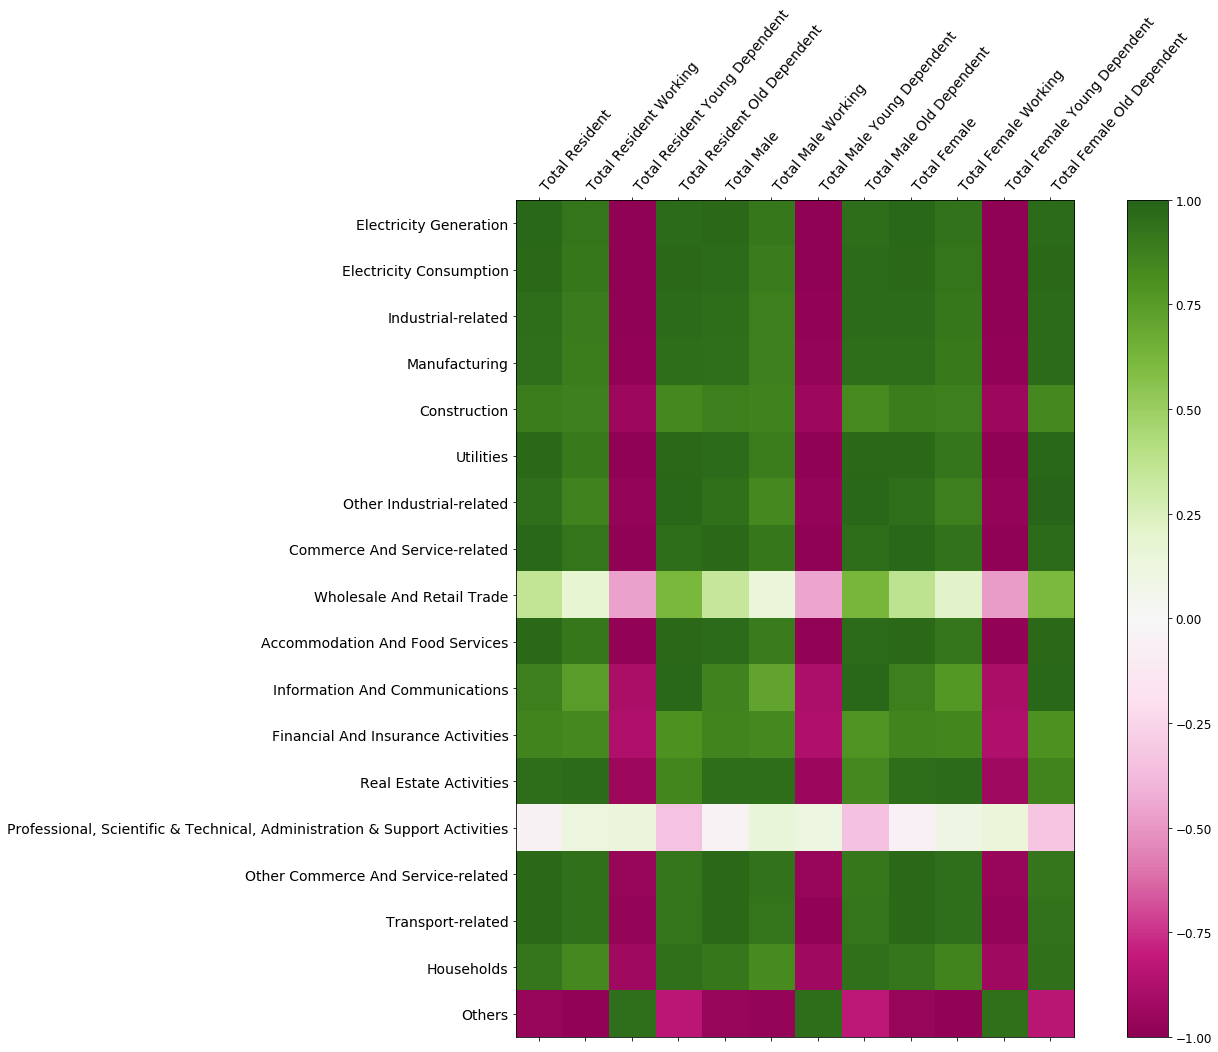

In [60]:
#plot correlation with matplotlib
f = plt.figure(figsize=(19,15))
plt.matshow(vis, fignum=f.number,cmap='PiYG', vmin=-1, vmax=1)
plt.xticks(range(12), vis.columns, fontsize=14, rotation=50, ha = "left")
plt.yticks(range(18), vis.index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)


In [56]:
#looking at correlation based on sex
vis[["Total Male", "Total Female"]]

,Total Male,Total Female
Electricity Generation,0.972792,0.979889
Electricity Consumption,0.968499,0.976500
Industrial-related,0.954309,0.963440
Manufacturing,0.946213,0.955596
Construction,0.881427,0.887267
Utilities,0.966962,0.975235
Other Industrial-related,0.940538,0.952540
Commerce And Service-related,0.974822,0.980249
Wholesale And Retail Trade,0.341760,0.372075
Accommodation And Food Services,0.968095,0.975033


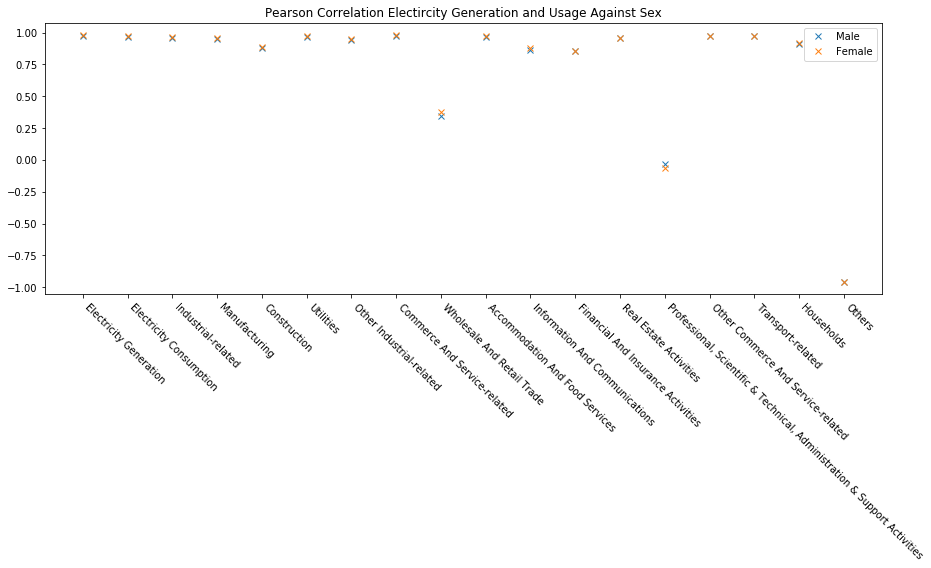

In [109]:
fig = plt.figure(figsize=(15,5))
plt.plot(vis.index, vis["Total Male"], "x")
plt.plot(vis.index, vis["Total Female"], "x")
plt.xticks(rotation = -45, ha = "left")
plt.legend(["Male", "Female"])
plt.title("Pearson Correlation Electircity Generation and Usage Against Sex");

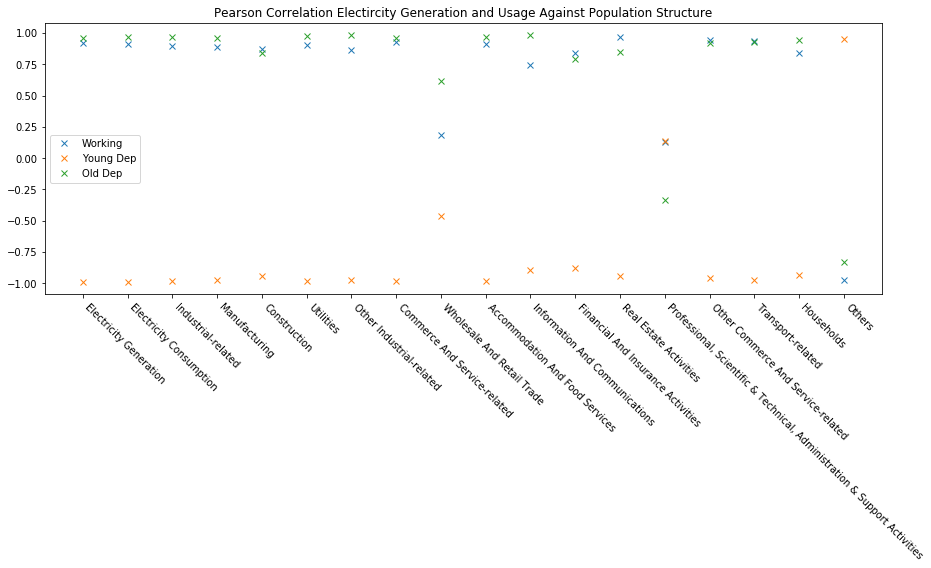

In [110]:
fig = plt.figure(figsize=(15,5))
plt.plot(vis.index, vis["Total Resident Working"], "x")
plt.plot(vis.index, vis["Total Resident Young Dependent"], "x")
plt.plot(vis.index, vis["Total Resident Old Dependent"], "x")
plt.xticks(rotation = -45, ha = "left")
plt.legend(["Working", "Young Dep", "Old Dep"])
plt.title("Pearson Correlation Electircity Generation and Usage Against Population Structure");